In [49]:
import pandas as pd

import config as cf
import utils as ut

In [50]:
# result directory
resdir = "/opt/storage/projects/o/pp7_llm/outputs/model_responses/gpt/gpt-4o"
md_file = cf.metadata_file
md_df = pd.read_csv(md_file, sep="\t")

In [51]:
from copy import copy
sys_jmt = ut.get_judgement_info_for_dir(resdir)
sys_jmt_orig = copy(sys_jmt)
sys_jmt = ["other" if kv[1] == 'no' else "comic" for kv in sorted(sys_jmt.items())]
ref_jmt = ["other" if va == 0 else "comic" for va in md_df['comic'].tolist()]
labels = ["comic", "other"]

In [52]:
sorted(sys_jmt_orig.items())

[('humor_0001_gpt-4o', 'sí'),
 ('humor_0002_gpt-4o', 'sí'),
 ('humor_0003_gpt-4o', 'no'),
 ('humor_0004_gpt-4o', 'sí'),
 ('humor_0005_gpt-4o', 'sí'),
 ('humor_0006_gpt-4o', 'sí'),
 ('humor_0007_gpt-4o', 'sí'),
 ('humor_0008_gpt-4o', 'no'),
 ('humor_0009_gpt-4o', 'sí'),
 ('humor_0010_gpt-4o', 'no'),
 ('humor_0011_gpt-4o', 'no'),
 ('humor_0012_gpt-4o', 'no'),
 ('humor_0013_gpt-4o', 'sí'),
 ('humor_0014_gpt-4o', 'sí'),
 ('humor_0015_gpt-4o', 'sí'),
 ('humor_0016_gpt-4o', 'sí'),
 ('humor_0017_gpt-4o', 'sí'),
 ('humor_0018_gpt-4o', 'no'),
 ('humor_0019_gpt-4o', 'sí'),
 ('humor_0020_gpt-4o', 'sí'),
 ('humor_0021_gpt-4o', 'sí'),
 ('humor_0022_gpt-4o', 'sí'),
 ('humor_0023_gpt-4o', 'sí'),
 ('humor_0024_gpt-4o', 'sí'),
 ('humor_0025_gpt-4o', 'sí'),
 ('humor_0026_gpt-4o', 'no'),
 ('humor_0027_gpt-4o', 'sí'),
 ('humor_0028_gpt-4o', 'no'),
 ('humor_0029_gpt-4o', 'no'),
 ('humor_0030_gpt-4o', 'no'),
 ('humor_0031_gpt-4o', 'no'),
 ('humor_0032_gpt-4o', 'no'),
 ('humor_0033_gpt-4o', 'no'),
 ('humor_0

In [53]:
sys_jmt

['comic',
 'comic',
 'other',
 'comic',
 'comic',
 'comic',
 'comic',
 'other',
 'comic',
 'other',
 'other',
 'other',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'other',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'other',
 'comic',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'other',
 'comic',
 'comic',
 'comic',
 'other',
 'comic',
 'comic',
 'other',
 'comic',
 'comic',
 'other',
 'other',
 'comic',
 'comic',
 'other',
 'comic',
 'comic',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other']

In [54]:
ref_jmt

['comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'other',
 'comic',
 'comic',
 'comic',
 'other',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'other',
 'comic',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'comic',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other',
 'other']

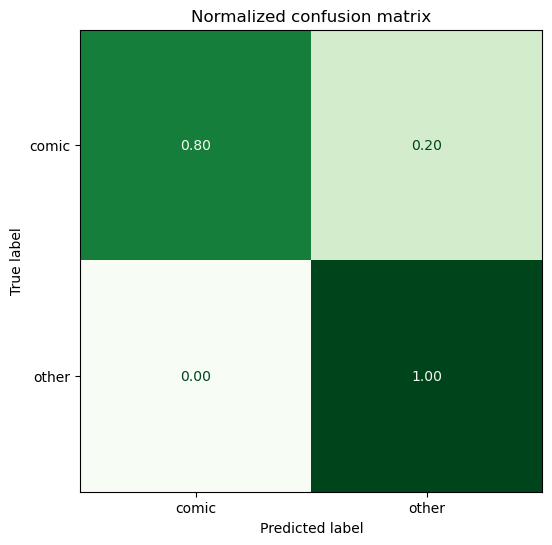

In [55]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

clrmap_dict = {"4o": "Greens", "35": "Blues"}
def plot_confusion_matrix(y_preds, y_true, labels, color_key):
    cm = confusion_matrix(y_true, y_preds, normalize="true")
    fig, ax = plt.subplots(figsize=(6, 6))
    #labels_for_fig = [l[0:4]+'.' for l in labels]
    labels_for_fig = labels
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  display_labels=labels_for_fig)
    #disp.plot(cmap="Purples", values_format=".2f", ax=ax, colorbar=False)
    disp.plot(cmap=clrmap_dict[color_key], values_format=".2f", ax=ax, colorbar=False)
    plt.title("Normalized confusion matrix")
    plt.show()

plot_confusion_matrix(sys_jmt, ref_jmt, labels, "4o")

In [63]:
plain_cm = confusion_matrix(ref_jmt, sys_jmt, normalize="true")

In [64]:
# note the 0, 1 when this renders on jupyter are indices, not 0 negative 1 positive
plain_cm

array([[0.8, 0.2],
       [0. , 1. ]])

In [57]:
sys_jmt[0:10]

['comic',
 'comic',
 'other',
 'comic',
 'comic',
 'comic',
 'comic',
 'other',
 'comic',
 'other']